## 実習の事前準備

In [1]:
# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# DataFrameですべての列を表示する設定
pd.options.display.max_columns = None

In [2]:
# CSVファイルからデータを読み込む
dataset_base = pd.read_csv("./baseball_salary_preprocessed.csv")
dataset_base.head()

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,打率,試合,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,0.308,143,651,556,171,23,92,13,83,4,113,2,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,0.271,138,629,565,153,14,56,8,32,1,107,30,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,0.290,143,679,565,164,8,60,35,89,15,120,6,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,0.265,116,405,344,91,27,78,0,50,8,111,0,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,0.292,100,288,243,71,9,48,2,40,1,56,0,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


In [3]:
# 列の抜き出し
dataset = dataset_base[['推定年俸', '打点', '年数', '打率', '本塁打', '球団勝率']]

# 列名をリネームする
dataset = dataset.rename(columns={'推定年俸': 'salary', '打点': 'points', \
    '年数': 'years_exp', '打率': 'batting', '本塁打': 'homerun', '球団勝率': 'team_win'})
dataset.head()

,salary,points,years_exp,batting,homerun,team_win
0,21000,92,11,0.308,23,0.633
1,19000,56,7,0.271,14,0.633
2,14000,60,5,0.290,8,0.633
3,11500,78,7,0.265,27,0.633
4,11000,48,20,0.292,9,0.633


## 線形回帰モデルの概要

<Axes: xlabel='points', ylabel='salary'>

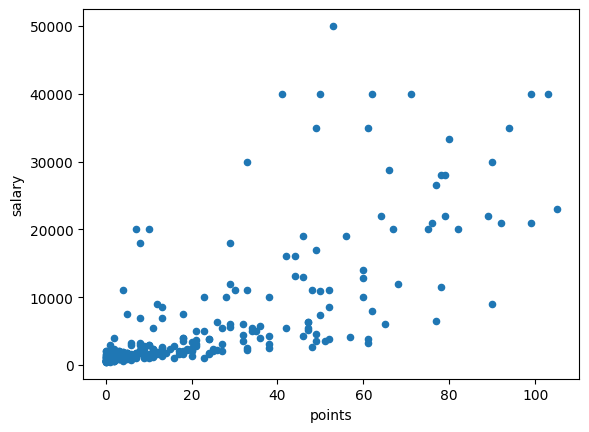

In [4]:
# 打点と推定年俸の散布図
dataset.plot(kind='scatter', x='points', y='salary')

## 線形回帰モデルを作ってみよう

### 1変数の線形回帰モデル

In [5]:
# 必要なライブラリの追加読み込み
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
# 目的変数（Y）：推定年俸、説明変数（X）：打点
Y = np.array(dataset['salary'])
X = np.array(dataset[['points']])

In [7]:
# 形状を確認
print("Y=", Y.shape, ", X=", X.shape)

Y= (241,) , X= (241, 1)


In [8]:
# XとYを機械学習用データ（train）とテストデータ（test）に7:3に分ける
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Trainをさらに学習データ（train）と検証データ（valid）に7:3に分ける
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [9]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (117,) , X_train= (117, 1)
Y_valid= (51,) , X_valid= (51, 1)
Y_test= (73,) , X_test= (73, 1)


In [10]:
# 線形回帰モデルの指定
linear_model = LinearRegression()

# fit()で学習を実施する
linear_model.fit(X_train, Y_train)

LinearRegression()

In [11]:
# predict()で予測を実施する
Y_pred = linear_model.predict(X_valid)

In [12]:
# 正解（検証データの目的変数）と予測値との比較
print(Y_valid[:5])
print(Y_pred[:5])

[1140 5400 5700 1650 3100]
[ 470.34255761 8918.81501551 9415.78398362 2955.18739817 5688.51672278]


In [13]:
# MSE（平均二乗誤差）を算出
linear_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(1変数の線形回帰モデル):', linear_model_mse)

MSE(1変数の線形回帰モデル): 66838239.72825806


In [14]:
# interceptは切片という意味
p0 = linear_model.intercept_

# coefは係数という意味
p1 = linear_model.coef_[0]

print("p0:", p0, ", p1:", p1)

p0: 470.3425576073523 , p1: 248.484484056025


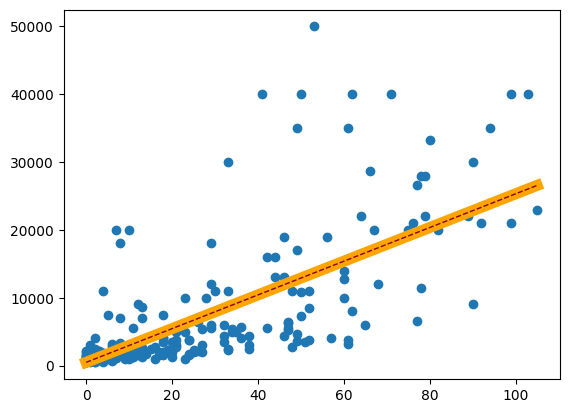

In [15]:
# パラメータを使った1次関数
def calc(x):
    return p0 + p1 * x

# 打点（X）の最小値～最大値の範囲で値を100個作成してリストに格納する
X_simu = np.linspace(X.min(), X.max(), 100)

# パラメータを使った1次関数による値
Y_simu = calc(X_simu)

# 線形回帰モデルによる予測値
Y_prd2 = linear_model.predict(X_simu.reshape(-1,1))

# １次関数：赤い点線、予測値：オレンジ、実際の値：青い散布図
plt.plot(X_simu, Y_prd2, color='orange', linewidth=8)
plt.plot(X_simu, Y_simu, color='darkred', linewidth=1, linestyle='dashed')
plt.scatter(X, Y)

### 1変数の線形回帰モデル（対数版）

In [16]:
# 推定年俸の対数
Y_log = np.log10(Y)

# 推定年俸と対数との比較
print(Y[:5])
print(Y_log[:5])

[21000 19000 14000 11500 11000]
[4.32221929 4.2787536  4.14612804 4.06069784 4.04139269]


In [17]:
# データセットの分割。Y_logを使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの作成～予測
log_model = LinearRegression()
log_model.fit(X_train, Y_train)
Y_pred = log_model.predict(X_valid)

In [18]:
# 対数から金額に戻す
Y_valid_org = np.power(10, Y_valid)
Y_pred_org = np.power(10, Y_pred)

# MSEを算出
log_model_mse = mean_squared_error(Y_valid_org, Y_pred_org)
print('MSE(1変数の線形回帰モデル～対数版):', log_model_mse)

MSE(1変数の線形回帰モデル～対数版): 76734989.36897755


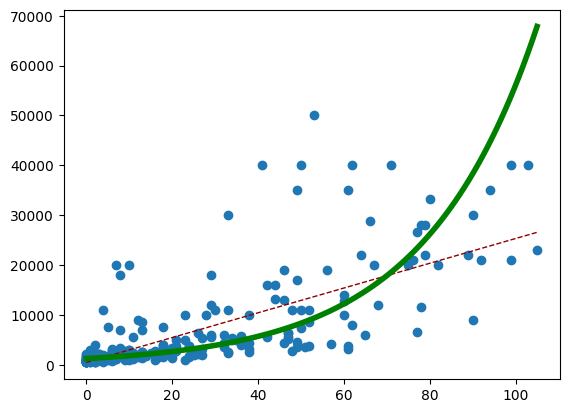

In [19]:
# 打点（X)の最小値～最大値の範囲で値を100個作成してリストに格納する
X_simu = np.linspace(X.min(), X.max(), 100)

# 線形回帰モデルによる予測値
Y_prd1 = linear_model.predict(X_simu.reshape(-1,1))

# 線形回帰モデル（対数版）による予測値
Y_prd2 = log_model.predict(X_simu.reshape(-1,1))
Y_prd2 = np.power(10, Y_prd2)

# １次関数：赤い点線、予測値：緑、実際の値：青い散布図
plt.plot(X_simu, Y_prd1, color='darkred', linewidth=1, linestyle='dashed')
plt.plot(X_simu, Y_prd2, color='green', linewidth=4, linestyle='solid')
plt.scatter(X, Y)

### 多項式モデル

In [20]:
# 以下の操作用に1次元配列に変換する
X2 = X.reshape(-1)

# pointsの2～5乗を新たな説明変数として追加
# np.stack()はndarrayを連結する関数
# axis:結合する次元を指定。1は列
X2 = np.stack([X2, X2**2, X2**3, X2**4, X2**5], axis=1)

# 形状を確認
print("Y=", Y.shape, ", X2=", X2.shape)

Y= (241,) , X2= (241, 5)


In [21]:
# データセットの分割。X2を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの作成～予測
linear_model2 = LinearRegression()
linear_model2.fit(X_train, Y_train)
Y_pred = linear_model2.predict(X_valid)

# MSEを算出
liner_model2_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(多項式モデル):', liner_model2_mse)

MSE(多項式モデル): 66191889.04343807


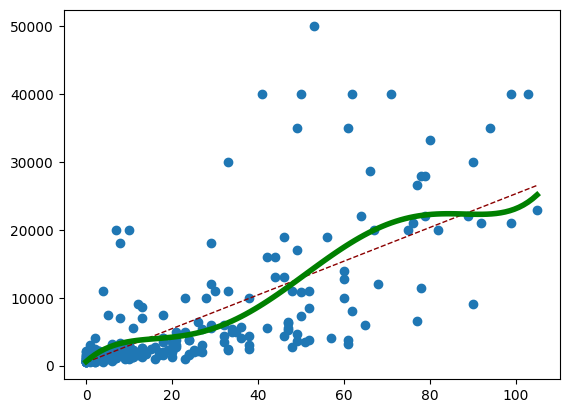

In [22]:
# 打点（X)の最小値～最大値の範囲で値を100個作成してリストに格納する
X_simu = np.linspace(X.min(), X.max(), 100)
X_simu2 = np.stack([X_simu, X_simu**2, X_simu**3, X_simu**4, X_simu**5], axis=1)

# 線形回帰モデルによる予測値
Y_prd1 = linear_model.predict(X_simu.reshape(-1,1))
# 線形回帰モデルによる予測値
Y_prd2 = linear_model2.predict(X_simu2)

# １次関数：赤い点線、予測値：緑、実際の値：青い散布図
plt.scatter(X, Y)
plt.plot(X_simu, Y_prd1, color='darkred', linewidth=1, linestyle='dashed')
plt.plot(X_simu, Y_prd2, color='green', linewidth=4, linestyle='solid')

### モデルの複雑さと過学習

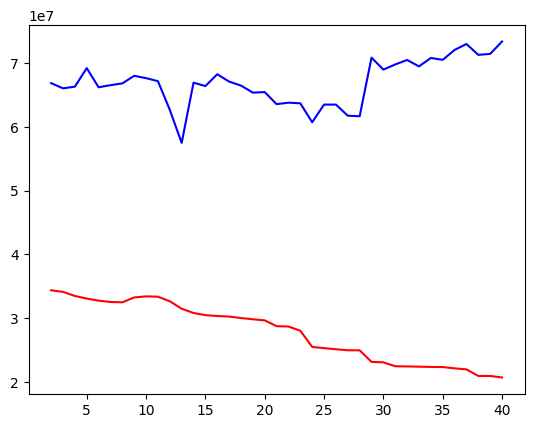

In [23]:
# MSEの結果を入れるリスト
mse_list_train = []
mse_list_valid = []

# 次元の範囲
degree = range(2, 41)

for i in degree:
    # i次元の多項式モデルを作成
    X3 = X.reshape(-1)
    X3 = np.stack([X3**j for j in range(1, i)], axis=1)

    # データセットの分割。X3を使っていることに注意
    X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.3, random_state=0)
    X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

    # モデルの作成～予測
    linear_model3 = LinearRegression()
    linear_model3.fit(X_train, Y_train)

    # 学習データに対する予測とMSEの算出
    Y_pred = linear_model3.predict(X_train)
    mse = mean_squared_error(Y_train, Y_pred)
    mse_list_train.append(mse)

    # 検証データに対する予測とMSEの算出
    Y_pred = linear_model3.predict(X_valid)
    mse = mean_squared_error(Y_valid, Y_pred)
    mse_list_valid.append(mse)

# グラフの描画
plt.plot(degree, mse_list_train, color="red")
plt.plot(degree, mse_list_valid, color="blue")

### 多重線形回帰モデル

In [24]:
# 目的変数（Y）：推定年俸:salary
# 説明変数（X）：打点:points, 年数:years_exp, 打率:batting, 本塁打:homerun, 球団勝率:team_win
X4 = np.array(dataset[['points', 'years_exp', 'batting', 'homerun', 'team_win']])

# 形状を確認
print("Y=", Y.shape, ", X4=", X4.shape)

Y= (241,) , X4= (241, 5)


In [25]:
# データセットの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの作成～予測
general_model = LinearRegression()
general_model.fit(X_train, Y_train)
Y_pred = general_model.predict(X_valid)

# MSEを算出
general_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(多重線形回帰モデル):', general_model_mse)

MSE(多重線形回帰モデル): 59313342.14717213


### その他の回帰モデル

In [26]:
# Lasso回帰
from sklearn.linear_model import Lasso

# データセットの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの作成～予測
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
Y_pred = lasso_model.predict(X_valid)

# MSEを算出
lasso_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(Lasso回帰):', lasso_model_mse)

MSE(Lasso回帰): 59325970.95844398


In [27]:
# Ridge回帰
from sklearn.linear_model import Ridge

# データセットの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの作成～予測
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)
Y_pred = ridge_model.predict(X_valid)

# MSEを算出
ridge_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(Ridge回帰):', ridge_model_mse)

MSE(Ridge回帰): 59881176.93127864


In [28]:
# 決定木
from sklearn.tree import DecisionTreeRegressor

# データセットの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
Y_pred = tree_model.predict(X_valid)

tree_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(回帰木):', tree_model_mse)

MSE(回帰木): 93677764.70588236


In [29]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

# データセットの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

randomforest_model = RandomForestRegressor(n_estimators=10, random_state=0)
randomforest_model.fit(X_train, Y_train)
Y_pred = randomforest_model.predict(X_valid)

randomforest_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(ランダムフォレスト):', randomforest_model_mse)

MSE(ランダムフォレスト): 76453938.74509804


## より良いモデルを目指して

### モデルと説明変数の選択

In [30]:
# 総当りで最良のMSEを算出する関数
import itertools

def get_best_features(x, y, feature_names, model):
    # すべての説明変数名の組み合わせを入れるリスト
    _name_list = []

    # 指定された長さの組み合わせを作成する
    for i in range(1, len(feature_names)+1):
        for sublist in itertools.combinations(feature_names, i):
            _name_list.append(list(sublist))

    # 最良のMSEを入れる変数（大きい値を入れておく）
    _best_mse = 999999999999
    _best_mse_name = ''

    # 総当りで比較する
    for _name in _name_list:
        _x = np.array(x[_name])

        _x_train, _x_test, _y_train, _y_test = train_test_split(_x, y, test_size=0.3, random_state=0)
        _x_train, _x_valid, _y_train, _y_valid = train_test_split(_x_train, _y_train, test_size=0.3, random_state=0)

        # モデルの作成～予測
        model.fit(_x_train, _y_train)
        _y_pred = model.predict(_x_valid)

        # MSEを算出
        _mse = mean_squared_error(_y_valid, _y_pred)

        # 最小のmseを保管
        if _mse < _best_mse:
            _best_mse = _mse
            _best_mse_name = _name

    print(model.__class__.__name__, ":", ','.join(_best_mse_name), ": MSE=", _best_mse)

In [31]:
# 説明変数名のリスト
feature_names = ['points', 'years_exp', 'batting', 'homerun', 'team_win']

# モデルのリストを用意
model_list = []
model_list.append(LinearRegression())
model_list.append(Lasso())
model_list.append(Ridge())
model_list.append(DecisionTreeRegressor())
model_list.append(RandomForestRegressor(n_estimators=100, random_state=0))

for model in model_list:
    get_best_features(dataset, Y, feature_names, model)

LinearRegression : points,years_exp,homerun,team_win : MSE= 59272503.230480604
Lasso : points,years_exp,homerun,team_win : MSE= 59290453.0997445
Ridge : points,years_exp,homerun,team_win : MSE= 59866522.48342748
DecisionTreeRegressor : years_exp,batting,homerun : MSE= 73811029.41176471
RandomForestRegressor : years_exp,batting,homerun,team_win : MSE= 75322931.14117648


In [32]:
from sklearn.model_selection import GridSearchCV

# モデル:ランダムフォレスト
model = RandomForestRegressor(random_state=0)

# パラメータ:n_estimators:木の数、max_depth:木の深さ
params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]}

# グリッドサーチの設定
# cv:交差検証の回数, scoring:目的変数
# 注意:scikit-learnのバージョンが、0.17の場合は、scoring='mean_squared_error' を指定する
gscv = GridSearchCV(model, param_grid=params, cv=3, scoring='neg_mean_squared_error')

In [33]:
# ランダムフォレストで性能が良かった説明変数の組み合わせを指定
X5 = np.array(dataset[['years_exp', 'homerun', 'team_win', 'batting']])

# データセットの分割。X5を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.3, random_state=0)

In [34]:
# 学習を実施
gscv.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, 10, 50],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [35]:
# MSE
gscv.best_score_

np.float64(-53609831.652131505)

In [36]:
# 最適なパラメータ
gscv.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [37]:
# 最適なパラメータによる学習
randomforest_model = RandomForestRegressor(**gscv.best_params_)
randomforest_model.fit(X_train, Y_train)

# テストデータによる評価
Y_pred = randomforest_model.predict(X_test)

randomforest_model_mse = mean_squared_error(Y_test, Y_pred)
print('MSE(ランダムフォレスト):', randomforest_model_mse)

MSE(ランダムフォレスト): 49822119.67511599
